In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv('../../data/events.csv', low_memory=False)

data['fecha'] = pd.to_datetime(data['timestamp'], errors='coerce')
data['mes'] = data['fecha'].dt.month
data['dayofyear'] = data['fecha'].dt.dayofyear

sns.set(style="white", context="talk")

# Intento hayar patrones o comportamientos en base a eventos

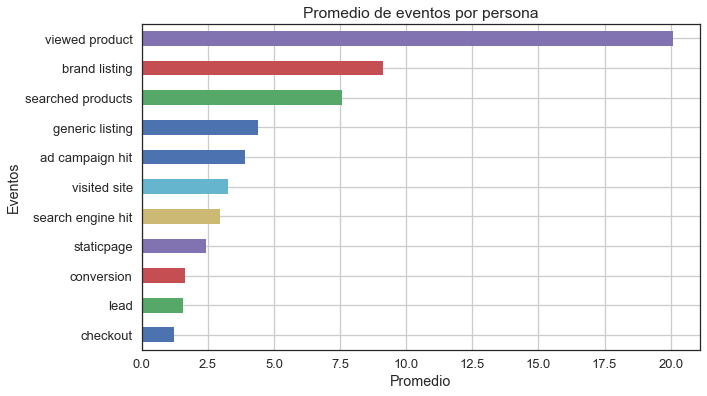

In [15]:
promedio_eventos_por_persona = data.groupby('person')['event'].value_counts().unstack('event').mean().sort_values()

graf = promedio_eventos_por_persona.plot(kind = 'barh', figsize = (10, 6))
graf.set_title('Promedio de eventos por persona')
graf.set_xlabel('Promedio')
graf.set_ylabel('Eventos')
graf.grid(True)


In [21]:
da = data.sort_values('person')
da

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,fecha,mes,dayofyear
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-31 23:38:05,5,151
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39,2018-05-31 23:38:05,5,151
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-31 23:38:09,5,151
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-31 23:38:40,5,151
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-29 13:29:25,5,149
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1,2018-05-29 13:29:26,5,149
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-29 13:29:27,5,149
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-29 13:29:35,5,149
28,2018-05-24 11:29:14,viewed product,000a54b2,NaN,6580.0,iPhone 6S,Muito Bom,16GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-24 11:29:14,5,144
29,2018-05-24 11:29:16,viewed product,000a54b2,NaN,6581.0,iPhone 6S,Bom,16GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-24 11:29:16,5,144
